<a href="https://colab.research.google.com/github/DanielRaiicHu/precio_de_inmuebles_regresion_lineal/blob/main/precios_de_inmuebles_regresion_lineal.ipynb?forceRefresh=true">
  <img src="https://drive.google.com/uc?export=view&id=191Woxwut0iaIL2hCcCIeXRSB6oba_88H" alt="Abrir en Colab" width="120"/>
</a>

#  **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando una recta

## Conociendo los datos

In [250]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
#Leyendo los datos
datos = pd.read_csv("/content/drive/MyDrive/regresion_lineal/precios_casas.csv")
datos.head()


,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [253]:
#Cuáles factores fueron colectados
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [254]:
# Eliminamos la columna de Id, porque es un número único y no lo vamos a utilizar
# Este dato no nos servirá para nuestro modelado
datos = datos.drop(columns='Id')

# Para asegurarnos que eliminamos la culumna
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  



In [255]:
# Correlación

# Calculamos la matriz de correlación de todas las columnas numéricas del DataFrame 'datos'
# Esto nos permite ver qué tan relacionadas están entre sí las variables numéricas
corr = datos.corr()

In [256]:
# Extraemos la columna de correlaciones respecto a 'precio_de_venta'
# Así sabremos qué variables tienen mayor o menor influencia en el precio
corr['precio_de_venta']

,precio_de_venta
area_primer_piso,0.616557
tiene_segundo_piso,0.138541
area_segundo_piso,0.305311
cantidad_banos,0.563132
capacidad_carros_garage,0.640214
calidad_de_cocina_excelente,0.496223
precio_de_venta,1.000000


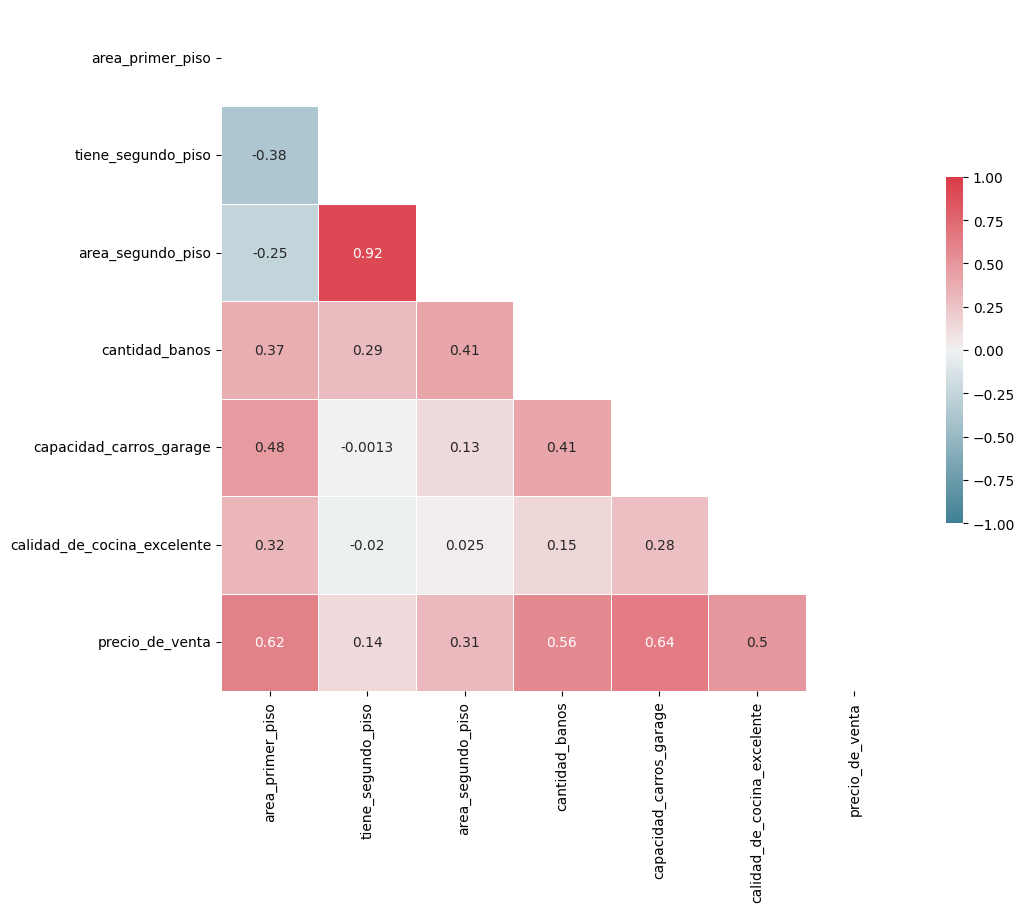

In [257]:
# Actividad
# Cuáles factores están más correlacionados?

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

**Para analizar la correlación:**

* Intensidad: se refiere a la fuerza de la relación entre las variables medidas. Puede variar de -1 a +1, donde -1 indica una correlación perfectamente negativa, +1 indica una correlación perfectamente positiva y 0 indica ausencia de correlación lineal.

* Dirección: se refiere a la naturaleza de la relación entre las variables medidas. Una correlación positiva indica que las variables aumentan o disminuyen juntas, mientras que una correlación negativa indica que una variable aumenta mientras la otra disminuye, o viceversa.

**Ejemplo:**

El coeficiente de correlación lineal entre el área del primer piso y el precio de venta es de 0.62, indicando una correlación positiva moderadamente fuerte (intensidad). En general, a medida que el área del primer piso de una casa aumenta, el precio de venta también tiende a aumentar (dirección).

>* La correlación entre la capacidad de coches en la garaje y el área del primer piso es 0.48 moderadamente positiva, indicando que, en general, a medida que la capacidad de coches en la garaje aumenta, el área del primer piso de la casa tiende a aumentar también.

>* Entre garaje para coches y cantidad de baños es moderadamente positiva (0.409281), indicando que, en general, a medida que la capacidad de la garaje aumenta, el número de baños también tiende a aumentar. Esto sugiere una posible asociación entre el espacio para estacionamiento de vehículos y el tamaño de la residencia.

>* Cuando miramos la correlación entre el área del primer piso y el área del segundo piso, verificamos que es débil y negativa (-0.25). Esto sugiere que, en general, cuando el área del primer piso de una casa aumenta, el área del segundo piso tiende a disminuir un poco, y viceversa. Esta relación indica una posible compensación entre las áreas de los dos pisos, pero no es una relación muy fuerte y puede variar entre diferentes propiedades.

**Observación:** Es importante notar que la correlación no implica causalidad; es decir, no podemos afirmar que el aumento en el precio de venta es causado específicamente por el aumento en el área del primer piso solo con el uso de la correlación, sino que estos factores están relacionados entre sí.

## Relacionando variables

In [258]:
# importando los paquetes para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

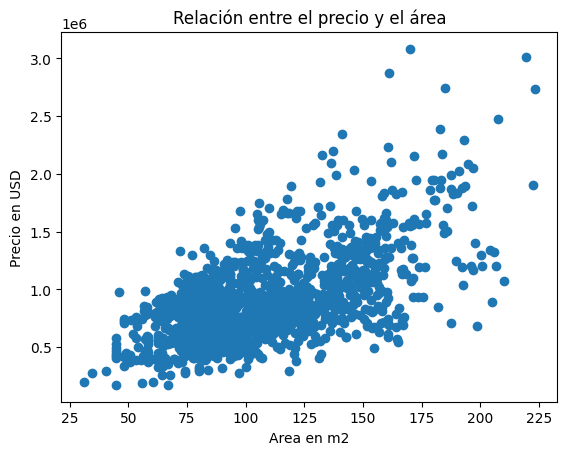

In [259]:
# Cómo se relacionan el área construída y el precio del inmueble?
plt.scatter(datos['area_primer_piso'],datos['precio_de_venta']) #ejes x,y
plt.title('Relación entre el precio y el área')
plt.xlabel('Area en m2')
plt.ylabel('Precio en USD')
plt.show()

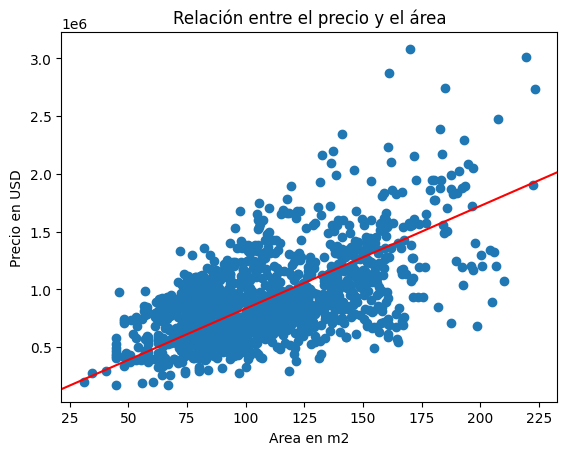

In [260]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# E si quisieramos trazar una línea que nos permita describir este comportamiento?

# Hacemos una recta al ojo

# Creamos un gráfico de dispersión (scatter plot) para observar la relación entre el área del primer piso y el precio de venta
plt.scatter(datos['area_primer_piso'], datos['precio_de_venta'])  # Eje x: área en m², Eje y: precio en USD

# Dibujamos una línea recta "a ojo" (sin cálculo estadístico), usando dos puntos de referencia
# Esta línea representa una estimación visual de la tendencia
plt.axline(xy1=(40, 300000), xy2=(175, 1500000), color='red')

# Agregamos un título al gráfico
plt.title('Relación entre el precio y el área')

# Etiquetamos el eje X (área en metros cuadrados)
plt.xlabel('Area en m2')

# Etiquetamos el eje Y (precio en dólares)
plt.ylabel('Precio en USD')

# Mostramos el gráfico
plt.show()

# A medida que aumenta el área, también aumenta el precio

## Mejor recta

In [261]:
# Cuál es la recta que mejor se ajusta a esta relación

# Creamos un gráfico de dispersión interactivo con Plotly Express
# Eje X: 'area_primer_piso', Eje Y: 'precio_de_venta'
# trendline='ols' → agrega una línea de tendencia basada en regresión lineal (OLS: Mínimos Cuadrados Ordinarios)
# trendline_color_override='red' → la línea de tendencia se dibuja en color rojo
px.scatter(datos, x='area_primer_piso',y='precio_de_venta',trendline_color_override='red',trendline='ols')

**En esta clase, aprendiste a:**

>* Obtener el coeficiente de correlación de los datos;
>* Analizar la intensidad y la dirección de la correlación entre dos variables;
>* Identificar la linealidad en el gráfico de dispersión;
>* Diferenciar la variable explicativa de la variable respuesta;
>* Visualizar la mejor línea utilizando Plotly.

# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso  
* Variable de respuesta/dependiente: Precio de la casa  

In [262]:
# x: área de la casa
# y: precio de la casa

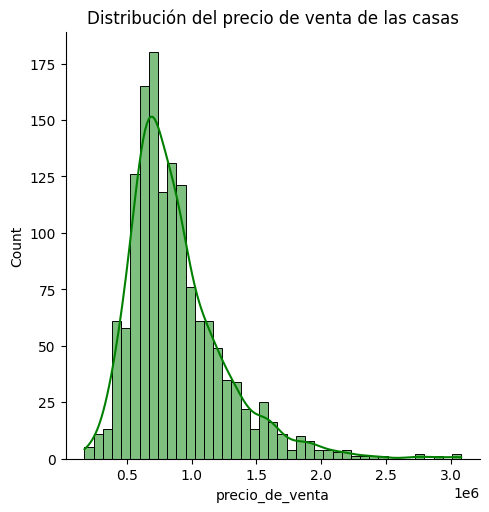

In [263]:
#Quién es nuestra variable de respuesta?

# Creamos una gráfica de distribución (histograma) con seaborn
# kde=True → agrega la curva de densidad (estimación de la función de probabilidad)
# color='green' → define el color del histograma y la curva de densidad
sns.displot(datos['precio_de_venta'], kde=True, color='green')

# Agregamos un título al gráfico
plt.title('Distribución del precio de venta de las casas')

# Mostramos el gráfico
plt.show()

### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

Dividir el conjunto de datos en conjuntos de entrenamiento y prueba es una práctica esencial en machine learning para evaluar la capacidad de generalización del modelo. El conjunto de entrenamiento se usa para entrenar el modelo, mientras que el conjunto de prueba se mantiene separado y se usa para evaluar el desempeño del modelo en datos no vistos, simulando cómo se comportaría el modelo al ser aplicado en situaciones reales.

In [264]:
# import train_test_split
# Este método es usado para dividir un dataset en dos partes:
# Datos de entrenamiento (train) → para construir el modelo.
# Datos de prueba (test) → para evaluar el rendimiento del modelo con datos nunca antes vistos.
from sklearn.model_selection import train_test_split

# Definimos la variable objetivo (target) que queremos predecir
y = datos['precio_de_venta']  # Precio de venta de los inmuebles

# Definimos las variables predictoras (features), eliminando la columna objetivo del DataFrame
X = datos.drop(columns='precio_de_venta')  # Todas las demás columnas serán usadas para predecir

# Dividimos los datos en conjuntos de entrenamiento (70%) y prueba (30%)
# random_state=230 asegura que la división sea siempre la misma si se vuelve a ejecutar el código
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230)

In [265]:
# Datos de entrenamiento para usar la fórmula

# Creamos un nuevo DataFrame a partir de las variables predictoras del conjunto de entrenamiento
df_train = pd.DataFrame(X_train)

# Agregamos la columna objetivo (precio de venta) al DataFrame de entrenamiento
# Esto nos permite tener nuevamente un conjunto completo para análisis exploratorio o modelado posterior
df_train['precio_de_venta'] = y_train

In [266]:
# import ols
# Importamos la función ols (Ordinary Least Squares) desde statsmodels
# Esta función permite ajustar un modelo de regresión lineal usando fórmulas tipo 'Y ~ X1 + X2'
from statsmodels.formula.api import ols

In [267]:
# Ajustando el primer modelo
# Creamos un modelo de regresión lineal simple para predecir el precio de venta
# con base en el área del primer piso (area_primer_piso)
# Creamos un modelo de regresión lineal simple donde:
# 'precio_de_venta' es la variable dependiente (objetivo)
# 'area_primer_piso' es la única variable independiente (predictora)
# El modelo se ajusta (fit) utilizando los datos del DataFrame de entrenamiento
modelo_0 = ols('precio_de_venta ~ area_primer_piso',data=df_train).fit() # precio_de_venta con respecto a area_primer_piso

## Analizando los coeficientes

(intensidad, dirección y significancia)




In [268]:
# visualizando los parámetros
# Mostramos los coeficientes del modelo: el intercepto y la pendiente respecto al área
modelo_0.params
# Para nuestro ejemplo, la únidad es dólares

,0
Intercept,152909.288334
area_primer_piso,6793.641641


>* Según el modelo, el precio base de una propiedad sería $152.909 incluso si el área del primer piso fuera 0 m².
>
>* Pero ¡ojo!: esto no significa que realmente se venda una casa sin área construida, sino que es una proyección matemática que sirve para ajustar la recta.

In [269]:
# El resumen del modelo

# Mostramos el resumen estadístico completo del modelo de regresión
# Incluye métricas como R², coeficientes, errores estándar, p-valores y más
print(modelo_0.summary())

# Con el resultado vemos que tiene un desvio estándar de 275.455 para más o para menos

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Thu, 31 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        09:27:03   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04  

- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $145.196,40. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.833,97. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.833,97.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [270]:
# Observamos el R² del modelo ajustado
# Donde 1 indica un ajuste perfecto y 0 indica que el modelo no explica nada

# Este valor se calcula utilizando los datos de entrenamiento
# Evalúa qué tan bien se ajusta el modelo a los datos con los que fue entrenado.
round(modelo_0.rsquared,2)

# Resultado: 0.37728010994297867

# Interpretación:
# El área del primer piso explica aproximadamente el 37.7% de la variación del precio de la casa.
# Por lo tanto, alrededor del 62.3% de esa variación depende de otros factores no incluidos en el modelo.

np.float64(0.38)

## Entendiendo el resíduo

In [271]:
# Quiénes son los residuos?

# Mostramos los residuos del modelo, también llamados errores residuales
# Cada residuo representa la diferencia entre el valor real observado y el valor estimado por el modelo para una observación
# Es decir, muestra los errores individuales del modelo para cada dato del conjunto de entrenamiento
modelo_0.resid

,0
1303,-193023.838744
326,-144522.356193
386,399612.747641
615,-68449.596607
236,166010.592859
...,...
777,465872.680999
271,-497642.319788
723,461150.204718
560,-540482.733402


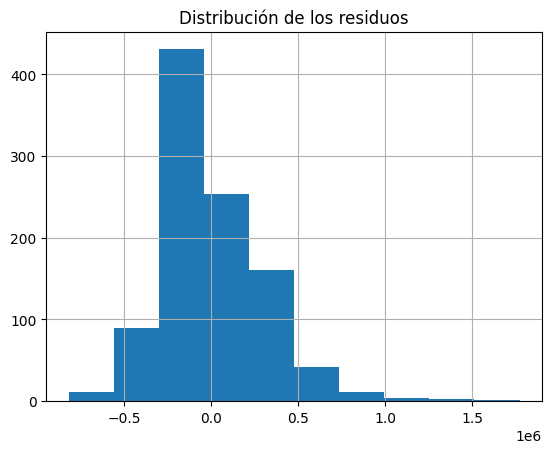

In [272]:
# Cómo están distribuidos
# Visualizamos cómo se distribuyen los residuos del modelo (errores individuales)
modelo_0.resid.hist()
plt.title('Distribución de los residuos')
plt.show()

**Interpretación del gráfico resultante de arriba**

* La mayoría de los residuos se agrupan cerca de 0, lo que en principio es esperado, pero no necesariamente positivo por sí solo.

Lo ideal sería que:

* La mayoría de los residuos estén muy cercanos a 0, con poca dispersión.

* La distribución de los residuos sea simétrica y con forma aproximadamente normal (campana).

* Haya pocos valores extremos (outliers) a ambos lados.

<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

## Obteniendo el R² de la previsión

In [273]:
# definiendo la 'Y' prevista
y_predict = modelo_0.predict(X_test)

In [274]:
# Importamos la función r2_score desde sklearn para calcular el R²
from sklearn.metrics import r2_score

In [275]:
# mostrando el resultado de r²
# Este valor se calcula utilizando los datos de prueba.
# Evalúa qué tan bien generaliza el modelo a datos que no ha visto durante el entrenamiento.
# Proporciona una evaluación más realista del rendimiento del modelo, midiendo su capacidad para predecir valores en datos nuevos.
print(f'El coeficiente de determinación R² para el modelo con los datos de prueba es de:  {round(r2_score(y_test, y_predict),2)}')

El coeficiente de determinación R² para el modelo con los datos de prueba es de:  0.39


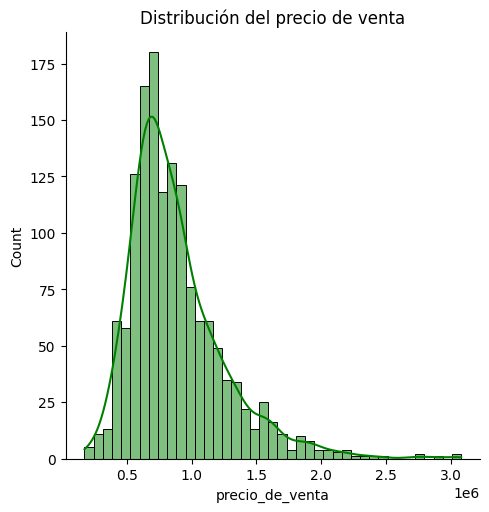

In [276]:
# Histograma como recurso visual para facilitar este análisis.
sns.displot(datos['precio_de_venta'], kde=True, color='green')
plt.title('Distribución del precio de venta')
plt.show()

>* Al ejecutar, pudimos identificar una asimetría en los datos. Tenemos algunos inmuebles cuyo precio de venta está lejos del comportamiento mediano, es decir, la presencia de valores muy altos sugiere la existencia de propiedades de alto valor, en comparación con la mayoría de las otras propiedades en el conjunto de datos.
>
>* Vale la pena señalar que identificar simetría en la distribución de la variable respuesta puede facilitar la interpretación de los resultados, ya que los valores extremos pueden influir en el análisis y las decisiones tomadas con base en el modelo de regresión lineal.

En esta clase, aprendiste a:
* Dividir la base de datos para entrenar y probar el modelo;
* Interpretar los coeficientes de regresión lineal simple;
* Calcular e interpretar el coeficiente de determinación R²;
* Analizar cuánto se desvía cada punto de datos de la línea de regresión ajustada a través de los residuos;
* Comprender qué tan bien se ajustan los valores observados al modelo de regresión con R²;
* Calcular el R² en el conjunto de prueba.

# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

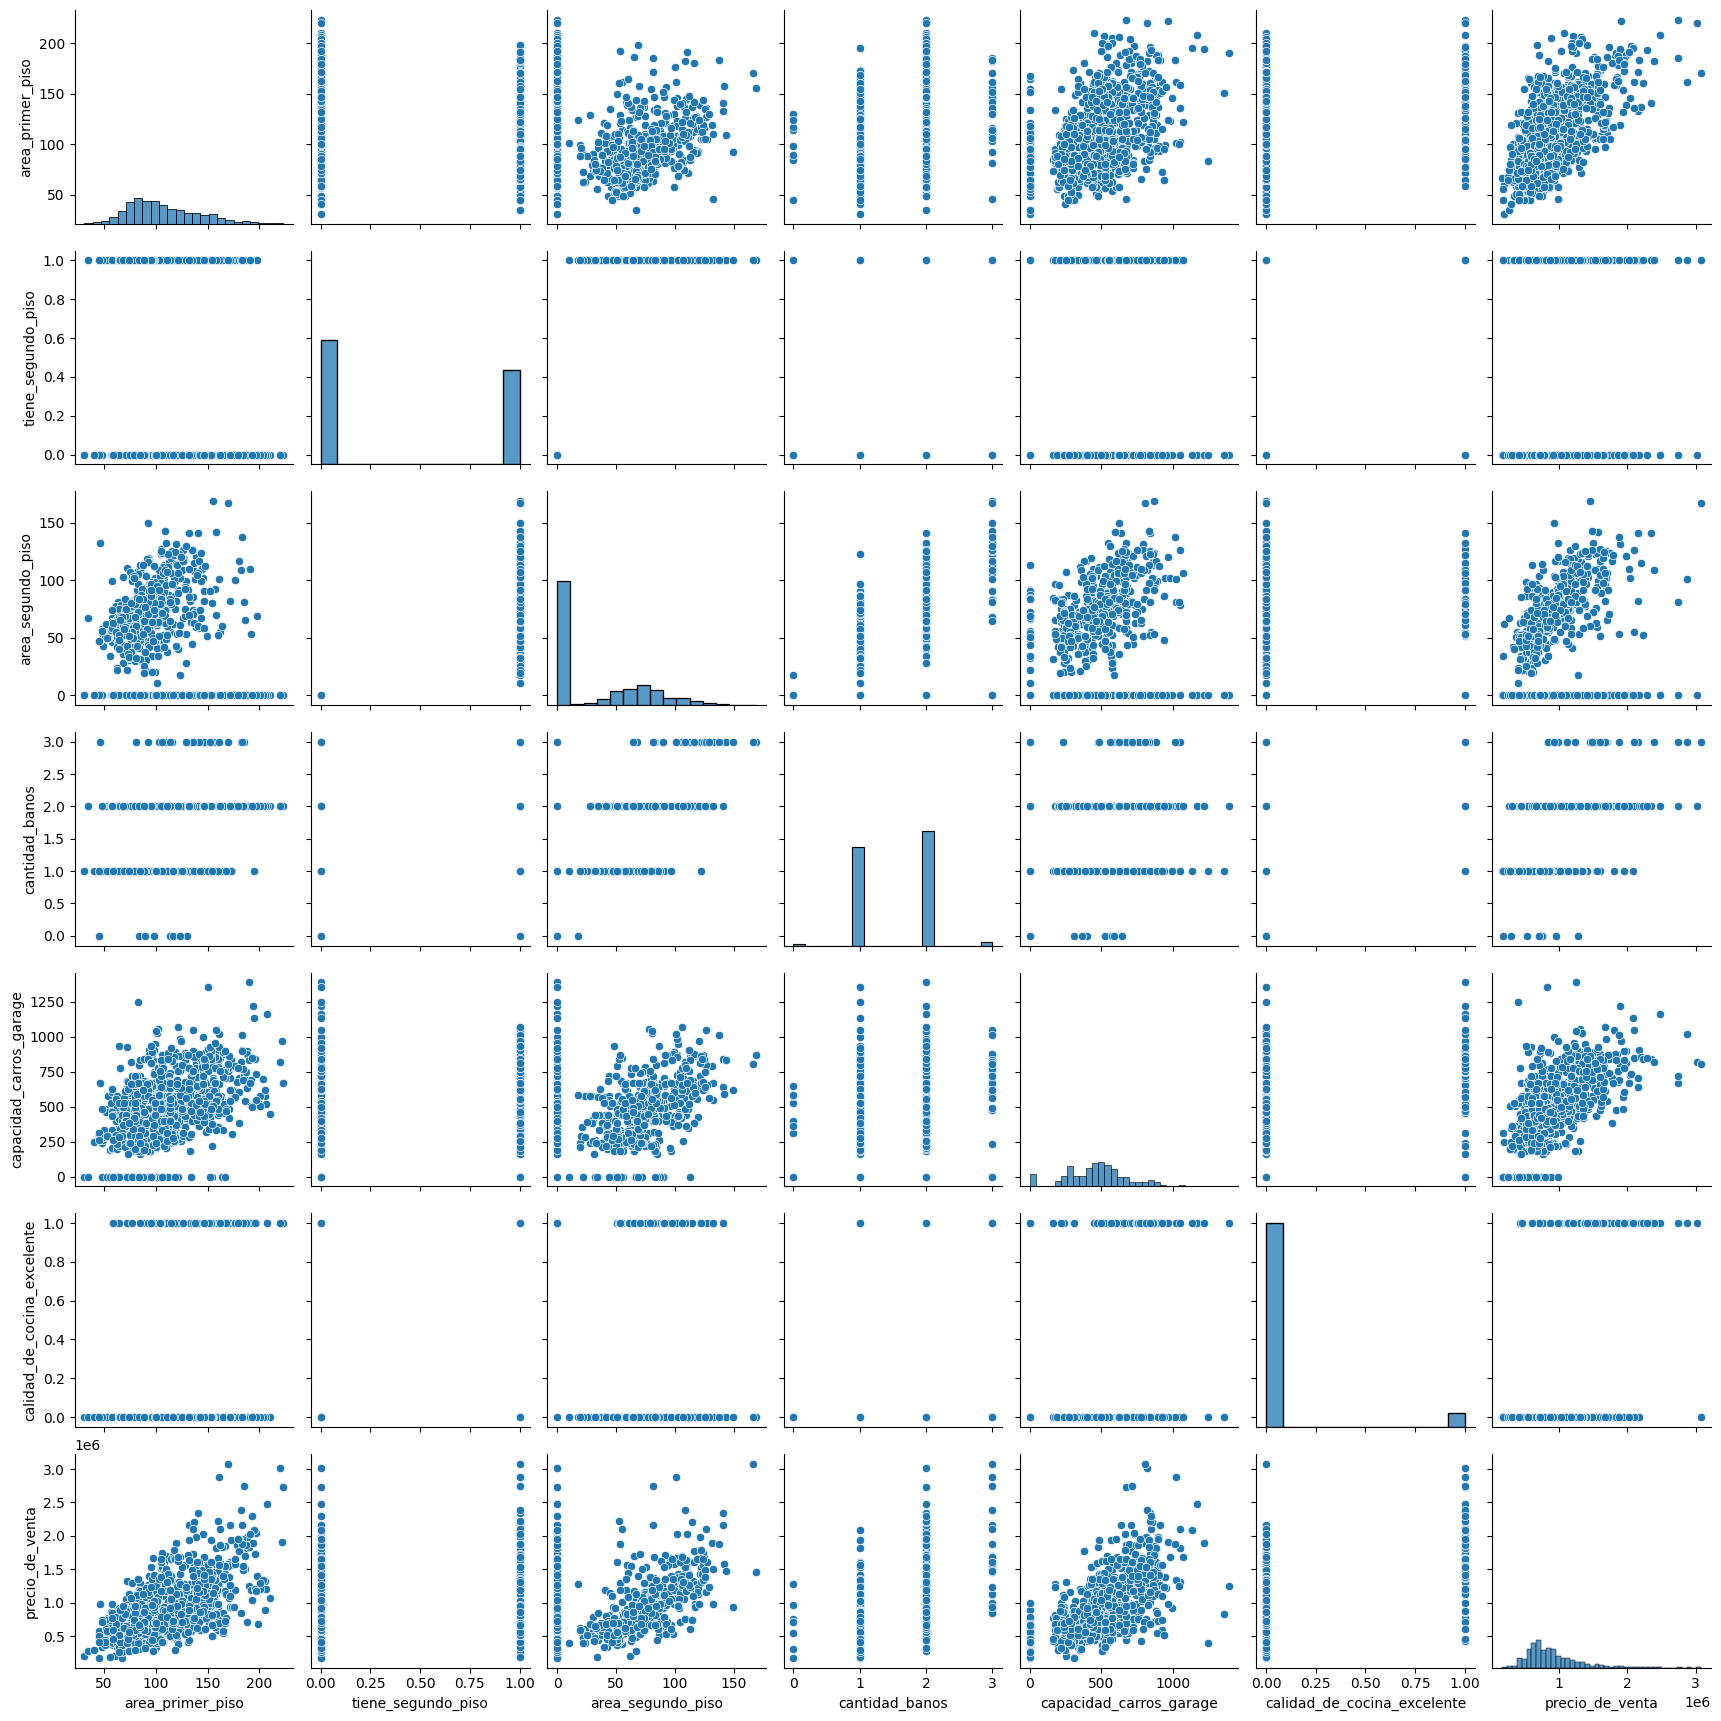

In [277]:
# cuáles otras características podrían explicar el precio de los inmuebles?

# Exploramos visualmente la relación entre múltiples variables numéricas del DataFrame
# Esto nos ayuda a identificar qué otras características podrían estar asociadas al precio de venta
sns.pairplot(datos)

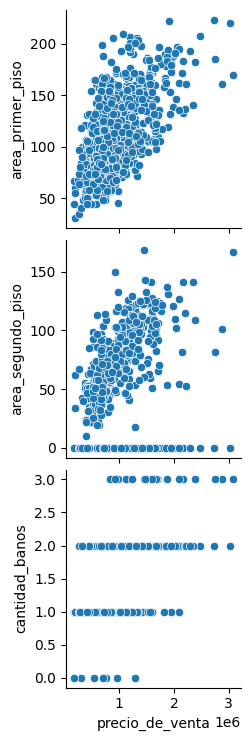

In [278]:
#Vamos a analizar solamente y_vars='precio_de_venta'

# Analizamos visualmente la relación entre el precio de venta y variables seleccionadas
# y_vars: variables en el eje Y (las que queremos evaluar como predictoras)
# x_vars: variable en el eje X (variable dependiente: precio de venta)
sns.pairplot(datos, y_vars=['area_primer_piso','area_segundo_piso','cantidad_banos'], x_vars='precio_de_venta')

## Añadiendo factores al modelo

In [279]:
# importando la api de statsmodels
# Esta librería ofrece herramientas estadísticas para modelado, análisis de regresión, pruebas y más
import statsmodels.api as sm

In [280]:
# Añadiendo una constante

# Añadimos una columna constante al conjunto de entrenamiento
# Esto es necesario porque el modelo sm.OLS() no incluye automáticamente el intercepto (β₀)
# Al agregar una columna con valor 1 (llamada 'const'), el modelo podrá estimar correctamente el punto de partida en el eje Y
# Es decir, podrá calcular el precio base cuando las demás variables valen cero
X_train = sm.add_constant(X_train)

# Mostramos las primeras filas del nuevo DataFrame con la constante añadida
X_train.head()

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [281]:
# Mostramos las columnas del conjunto X_train (útil para confirmar qué variables están disponibles)
X_train.columns

Index(['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente'],
      dtype='object')

In [282]:
# Creando el modelo de regresión (con todas las variables): saturado
# Creamos el modelo saturado: incluye todas las variables seleccionadas
modelo_1 = sm.OLS(y_train, X_train[['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']]).fit()

In [283]:
# Modelo sin el área del segundo piso
modelo_2 = sm.OLS(y_train, X_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
                                    'cantidad_banos', 'capacidad_carros_garage',
                                    'calidad_de_cocina_excelente']]).fit()

In [284]:
# Creamos un modelo más simple, sin el área del segundo piso ni la información del garage
# Modelo sin la información del garage
# Modelo sin el área del segundo piso
modelo_3 = sm.OLS(y_train, X_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
                                    'cantidad_banos', 'calidad_de_cocina_excelente']]).fit()

In [285]:
# Creamos una lista con todos los modelos para imprimir sus resúmenes de forma ordenada
modelos = [modelo_0, modelo_1, modelo_2, modelo_3]

# Imprimimos el resumen estadístico de cada modelo para comparar sus resultados
for i,j in enumerate(modelos):
  print(f'******************************************************************************\n******************* El modelo {i} tiene el siguiente resumen *******************\n******************************************************************************')
  print(j.summary(),'\n\n')

******************************************************************************
******************* El modelo 0 tiene el siguiente resumen *******************
******************************************************************************
                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Thu, 31 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        09:27:10   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust               

In [286]:
for i, j in enumerate (modelos):
  print(f'El coeficiente de determinación R² del modelo {i}: {j.rsquared.round(2)}')

El coeficiente de determinación R² del modelo 0: 0.38
El coeficiente de determinación R² del modelo 1: 0.74
El coeficiente de determinación R² del modelo 2: 0.71
El coeficiente de determinación R² del modelo 3: 0.65


El R² ajustado es una medida más robusta que el R² simple, ya que penaliza la inclusión de variables que no contribuyen significativamente al modelo. Esto ayuda a equilibrar la complejidad del modelo con su capacidad explicativa, proporcionando una base más sólida para la elección del modelo.

## Comparando los modelos
Cuál es el modelo?


In [287]:
# Cuántos parámetros tiene el modelo?
modelo_3.params

,0
const,-129979.678094
area_primer_piso,6119.653184
tiene_segundo_piso,221306.959705
cantidad_banos,149036.289458
calidad_de_cocina_excelente,444391.228573


**Interpretaciones clave (basadas en coeficientes):**

* Área del primer piso: Por cada metro cuadrado adicional, el precio de venta aumenta en promedio $6.119.

* Tiene segundo piso: Las casas con segundo piso cuestan en promedio $221.306 más que aquellas sin segundo piso.

* Cantidad de baños: Cada baño adicional incrementa el precio en $149.036.

* Cocina excelente: Tener una cocina de calidad excelente aumenta el precio en promedio $444.391 respecto a las que no lo tienen.



**El modelo_3 fue elegido porque:**

* Tiene un R² suficientemente alto (0.65),

* Es más simple y fácil de interpretar que modelos más complejos,

* Todas sus variables son significativas, y

* Evita incluir información redundante que no mejora mucho la capacidad explicativa.

Esto lo convierte en un modelo parsimonioso y eficaz, ideal para explicar el precio de venta de viviendas sin sobreajustarse a los datos.

------------------------------------------
En esta clase, aprendiste a:
* Utilizar el pairplot de Seaborn para visualizar relaciones entre múltiples variables e identificar cuáles pueden influir en el precio de venta de las casas.
* Agregar múltiples variables explicativas al modelo de regresión lineal para mejorar la precisión de las predicciones de precios.
* Comparar diferentes modelos de regresión lineal utilizando el R² y el R² ajustado, además de analizar la multicolinealidad y otros factores.
* Descubrir cómo interpretar los coeficientes del modelo de regresión lineal para entender el impacto de cada variable en el precio de las casas.
* Entender la importancia de elegir el modelo más adecuado para la predicción de precios, considerando la simplicidad, la precisión y la interpretabilidad.

# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [288]:
# Añadiendo una constante en X_test
X_test = sm.add_constant(X_test)
X_test.head(2)

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
997,1.0,94.9438,0,0.0000,1,280,0
805,1.0,74.1342,1,78.2218,2,595,0


Predice los valores del precio de venta (precio_de_venta) utilizando el modelo ya entrenado (modelo_3) sobre el conjunto de prueba (X_test) solo con las columnas que fueron usadas para entrenarlo.

In [289]:
# Previsión con el modelo 3
# Usamos el modelo entrenado 'modelo_3' para predecir los valores de precio en los datos de prueba.
# Solo se seleccionan las mismas variables usadas durante el entrenamiento del modelo 3.
# Esto permite evaluar el desempeño del modelo sobre datos que no ha visto.
prevision_3 = modelo_3.predict(X_test[['const', 'area_primer_piso', 'tiene_segundo_piso',
                                       'cantidad_banos', 'calidad_de_cocina_excelente']])

In [290]:
# comprobando datos
r2_score(y_test, prevision_3)

0.6432078074497706

In [291]:
# comprobando datos
print(X_train.shape, y_train.shape)  # Base de entrenamiento
print(X_test.shape, y_test.shape)    # Base de prueba

(1006, 7) (1006,)
(432, 7) (432,)


In [292]:
# Coeficiente de determinación R² en la base de entrenamiento
print(f'El coeficiente R² con respecto a la base de entrenamiento es: {modelo_3.rsquared.round(2)}')

El coeficiente R² con respecto a la base de entrenamiento es: 0.65


In [293]:
# Coeficiente de determinación R² en la base de prueba
print(f'El coeficiente R² con respecto a la base de prueba es: {round(r2_score(y_test, prevision_3), 2)}')

El coeficiente R² con respecto a la base de prueba es: 0.64


## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [294]:
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

In [295]:
# Nuevo inmueble

# Creamos un nuevo DataFrame que representa un inmueble hipotético con ciertas características
nuevo_inmueble = pd.DataFrame({
    'const': [1],                         # Constante agregada al modelo para el cálculo del intercepto
    'area_primer_piso': [120],           # Área del primer piso del inmueble
    'tiene_segundo_piso': [1],           # Indicador binario: 1 si tiene segundo piso, 0 si no
    'cantidad_banos': [2],               # Número de baños
    'calidad_de_cocina_excelente': [0]   # Indicador binario: 1 si tiene cocina excelente, 0 si no
})


In [296]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?

# Este modelo solo utiliza el área del primer piso como variable explicativa, por lo tanto, pasamos únicamente esa columna
modelo_0.predict(nuevo_inmueble['area_primer_piso']).round(2)

,0
0,968146.29


In [297]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?

# Este modelo ya fue entrenado con todas las variables presentes en el DataFrame 'nuevo_inmueble', por lo tanto, se puede usar directamente
modelo_3.predict(nuevo_inmueble).round(2)
# Entonces podemos decir que nuestra casa nueva, su valor estimado sería de 1123758.24 dólares.

,0
0,1123758.24


In [298]:
modelo_3.params

,0
const,-129979.678094
area_primer_piso,6119.653184
tiene_segundo_piso,221306.959705
cantidad_banos,149036.289458
calidad_de_cocina_excelente,444391.228573


## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [299]:
# Leyendo varias casas?
nuevas_casas = pd.read_csv('/content/drive/MyDrive/regresion_lineal/nuevas_casas.csv',sep=';')
nuevas_casas.head(2)

,Casa,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,1,150,1,2,1
1,2,180,0,3,1


In [300]:
# Eliminamos la columna 'Casa' ya que es solo un identificador y no se utilizará en la predicción
nuevas_casas.drop(columns='Casa',inplace=True) #inplace=True para que se elimine inmediatamente
nuevas_casas.head(2)

,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,150,1,2,1
1,180,0,3,1


In [301]:
# Añadiendo una constante
nuevas_casas = sm.add_constant(nuevas_casas)

In [302]:
# Cuál es el precio de estas nuevas casas?
# precio_casas = pd.DataFrame()
precio_casas = pd.DataFrame()
precio_casas['Precio de Venta'] = modelo_3.predict(nuevas_casas).round(2)
precio_casas

,Precio de Venta
0,1751739.07
1,1863057.99
2,1568149.47
3,2206758.02
4,1591628.64
5,1246151.31
6,1357470.23
7,1552133.97
8,963647.81
9,1639973.72


In [303]:
nuevas_casas['Precio de Venta'] = modelo_3.predict(nuevas_casas).round(2)
nuevas_casas

,const,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente,Precio de Venta
0,1.0,150,1,2,1,1751739.07
1,1.0,180,0,3,1,1863057.99
2,1.0,120,1,2,1,1568149.47
3,1.0,200,1,3,1,2206758.02
4,1.0,160,0,2,1,1591628.64
5,1.0,140,1,2,0,1246151.31
6,1.0,170,0,3,0,1357470.23
7,1.0,190,1,2,0,1552133.97
8,1.0,130,0,2,0,963647.81
9,1.0,180,1,3,0,1639973.72


In [304]:
# Recibiste una solicitud para estimar el precio de una casa con las siguientes características:
# 1 baño
# Área 98m²
# No tiene segundo piso
# Calidad de la cocina excelente

nuevo_inmueble_2 = pd.DataFrame({
    'const': [1],
    'area_primer_piso': [98],
    'tiene_segundo_piso': [0],
    'cantidad_banos': [1],
    'calidad_de_cocina_excelente': [1]
})

modelo_3.predict(nuevo_inmueble_2).round(2)

,0
0,1063173.85


En esta clase, aprendiste a:
* Obtener la métrica R² del modelo a partir de datos de prueba;
* Entender la importancia de la comparación de métricas de entrenamiento y prueba para verificar la generalización del modelo;
* Utilizar el método predict para realizar la predicción de nuevos valores a partir de un modelo de regresión;
* Guardar un modelo de machine learning utilizando la biblioteca pickle;
* Leer archivos pickle para obtener el modelo en su estado original.

# 5. Investigando el modelo





## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [305]:
# Importamos la función VIF desde statsmodels para detectar multicolinealidad
# Factor de Inflación de la Varianza (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [306]:
# Definimos las listas de variables explicativas que se usarán en distintos modelos de regresión

# explicativas_1: Incluye todas las variables disponibles, incluida el área del segundo piso
explicativas_1 = ['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
                  'cantidad_banos', 'capacidad_carros_garage',
                  'calidad_de_cocina_excelente']

# explicativas_2: Excluye 'area_segundo_piso', posible variable redundante con 'tiene_segundo_piso'
explicativas_2 = ['const', 'area_primer_piso', 'tiene_segundo_piso',
                  'cantidad_banos', 'capacidad_carros_garage',
                  'calidad_de_cocina_excelente']

# explicativas_3: Reduce aún más el número de variables, eliminando también 'capacidad_carros_garage'
explicativas_3 = ['const', 'area_primer_piso', 'tiene_segundo_piso',
                  'cantidad_banos', 'calidad_de_cocina_excelente']

In [307]:
# VIF 1
# Creamos un DataFrame con las variables explicativas del modelo 1
vif_1 = pd.DataFrame()

# Agregamos los nombres de las variables al DataFrame
vif_1['variables'] = explicativas_1

# Calculamos el VIF (Factor de Inflación de la Varianza) para cada variable en el modelo 1
# Utilizamos una comprensión de listas para aplicar la función vif a cada columna
# X_train[explicativas_1] → subconjunto del X_train con las columnas listadas en explicativas_1
# i → índice de la columna evaluada por vif()
vif_1['vif'] = [vif(X_train[explicativas_1], i) for i in range(len(explicativas_1))]

# Mostramos la tabla de resultados de VIF para el modelo 1
vif_1
# Como respuesta, se observa que hay **multicolinearidad**, ya que algunas variables tienen VIF > 5 o incluso > 10

,variables,vif
0,const,20.230833
1,area_primer_piso,2.193680
2,tiene_segundo_piso,7.455059
3,area_segundo_piso,7.589396
4,cantidad_banos,1.720795
5,capacidad_carros_garage,1.570078
6,calidad_de_cocina_excelente,1.182606


In [308]:
# VIF 3
# Ahora realizamos el mismo procedimiento, pero con las variables del modelo 3, donde ya ajustamos las variables para reducir la multicolinearidad
vif_3 = pd.DataFrame()

# Asignamos al DataFrame los nombres de las variables del modelo 3
vif_3['variables'] = explicativas_3

# Calculamos el VIF para cada variable en el modelo 3
vif_3['vif'] = [vif(X_train[explicativas_3], i) for i in range(len(explicativas_3))]

# Mostramos la tabla de resultados de VIF para el modelo 3
vif_3
# Como resultado, se observa que **no hay multicolinearidad significativa** en las variables del modelo 3,
# ya que todos los VIF están por debajo de 5 (y preferiblemente por debajo de 2.5 o 3).

,variables,vif
0,const,18.773457
1,area_primer_piso,1.919046
2,tiene_segundo_piso,1.644067
3,cantidad_banos,1.539255
4,calidad_de_cocina_excelente,1.151795


## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

In [309]:
# Previsión de los valores de entrenamiento usando el modelo_3
# Usamos las variables explicativas del modelo_3 sobre los datos de entrenamiento (X_train)
# para obtener los valores de precio estimado (y_previsto_train)
y_previsto_train = modelo_3.predict(X_train[explicativas_3])


In [310]:
# Visualización de los valores previstos vs los valores reales
# Se crea un gráfico de dispersión donde el eje X muestra los valores previstos (estimaciones del modelo)
# y el eje Y muestra los valores reales de los precios de venta
fig = px.scatter(
    x=y_previsto_train,
    y=y_train,
    title='Valor Previsto vs Real',
    labels={'x': 'Valor Previsto', 'y': 'Valor Real'}
)
fig.show()

In [311]:
# Cálculo de los residuos del modelo_3
# Los residuos son la diferencia entre el valor real y el valor estimado por el modelo
# Nos permite analizar qué tan bien el modelo está ajustando los datos
residuos = modelo_3.resid

# Visualización de los residuos en función de los valores previstos
# Este gráfico ayuda a detectar patrones no deseados en los residuos
# Idealmente, los residuos deben estar distribuidos de forma aleatoria alrededor de 0
fig = px.scatter(
    x=y_previsto_train,
    y=residuos,
    title='Valor Previsto vs Residuos',
    labels={'x': 'Valor Previsto', 'y': 'Residuos'}
)
fig.show()


<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">

# Manos a la obra: análisis y selección de modelos de regresión lineal

Este ejercicio venía anexado al Aula 3

Como persona Científica de Datos, estás a cargo del análisis del problema de fijación de precios de habitaciones de hoteles, utilizando el conjunto de datos proporcionado. Para ello, dispones de este dataset.

En esta actividad, tu tarea consiste en llevar a cabo las siguientes etapas:

1. Análisis inicial con el PairPlot de Seaborn;
2. Construir modelos de regresión lineal; y
3. Realizar la comparación de estos modelos.

Dedica tiempo a las actividades y desarrolla tus habilidades a través de la aplicación de tus conocimientos adquiridos a lo largo del curso.

In [312]:
import pandas as pd

In [313]:
dataset = pd.read_csv('/content/drive/MyDrive/regresion_lineal/hoteis.csv')
dataset.head()

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


## 1. Análisis inicial con el PairPlot de Seaborn

In [314]:
import seaborn as sns

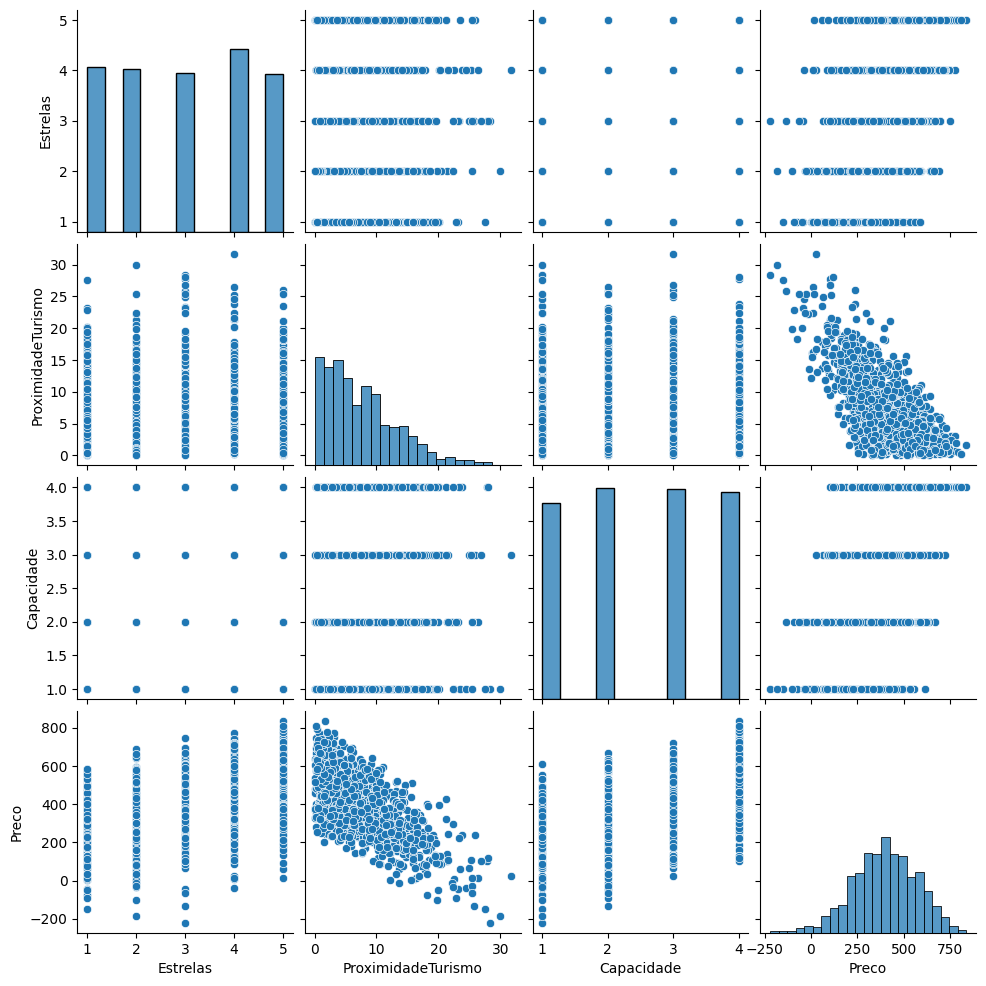

In [315]:
# Este gráfico muestra las relaciones entre las variables del dataset: Preco (precio), Estrelas (categoría del hotel),
# ProximidadeTurismo (distancia a puntos turísticos) y Capacidade (capacidad de personas del hotel).
sns.pairplot(dataset)

Lo que se identificó:
>* Relación positiva entre Estrelas y Preco: hoteles con más estrellas tienden a tener precios más altos.
>
>* Relación negativa entre ProximidadeTurismo y Preco: a menor distancia de zonas turísticas, mayor precio.
>
>* Capacidade también muestra cierta correlación positiva con el precio, aunque menos clara.

## 2. Construir modelos de regresión lineal

Se construyeron tres modelos de regresión lineal creciente en complejidad:

In [316]:
# Modelo 1: Utilizando apenas 'Estrelas'
X1 = dataset[['Estrelas']]
X1 = sm.add_constant(X1)  # Adicionando a constante
y = dataset['Preco']
modelo_1 = sm.OLS(y, X1).fit()
# Comentario: Modelo muy simple, con baja capacidad explicativa. Solo explica un 16% de la variabilidad del precio.

# Modelo 2: Utilizando 'Estrelas' e 'ProximidadeTurismo'
X2 = dataset[['Estrelas', 'ProximidadeTurismo']]
X2 = sm.add_constant(X2)
modelo_2 = sm.OLS(y, X2).fit()
# Comentario: Gran mejora al incluir la proximidad turística. Ahora se explica casi el 65% de la variabilidad.

# Modelo 3: Utilizando 'Estrelas', 'ProximidadeTurismo' e 'Capacidade'
X3 = dataset[['Estrelas', 'ProximidadeTurismo', 'Capacidade']]
X3 = sm.add_constant(X3)
modelo_3 = sm.OLS(y, X3).fit()
# Comentario: Modelo con excelente capacidad explicativa. Al incluir la capacidad, se alcanza un R² de 0.92,
# lo que significa que el modelo explica el 92% del precio de las habitaciones.

## 3. Realizar la comparación de estos modelos

In [317]:
print("Modelo 1 - Apenas 'Estrelas':")
print(modelo_1.summary())
print("\nModelo 2 - 'Estrelas' e 'ProximidadeTurismo':")
print(modelo_2.summary())
print("\nModelo 3 - 'Estrelas', 'ProximidadeTurismo' e 'Capacidade':")
print(modelo_3.summary())

Modelo 1 - Apenas 'Estrelas':
                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     191.3
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           6.09e-40
Time:                        09:27:13   Log-Likelihood:                -6476.7
No. Observations:                1000   AIC:                         1.296e+04
Df Residuals:                     998   BIC:                         1.297e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.3517 

In [318]:
from sklearn.metrics import r2_score

# Calcular e imprimir R² para cada modelo
print(f"R² para o modelo 1: {r2_score(y, modelo_1.predict(X1))}")
print(f"R² para o modelo 2: {r2_score(y, modelo_2.predict(X2))}")
print(f"R² para o modelo 3: {r2_score(y, modelo_3.predict(X3))}")

R² para o modelo 1: 0.16088060910369284
R² para o modelo 2: 0.6498344879892148
R² para o modelo 3: 0.9230202753377601


**El Modelo 3 es claramente el más adecuado porque:**

* Tiene el R² más alto (0.92), lo que indica un ajuste casi perfecto.

* Las variables seleccionadas tienen sentido lógico y relevancia estadística.

* Mejora progresiva entre modelos muestra que cada nueva variable aporta valor.

* Mantiene un buen equilibrio entre simplicidad y explicabilidad (modelo parsimonioso).

**Comentario final:**
La selección de variables a través de modelos progresivos muestra cómo cada atributo del hotel (estrellas, proximidad y capacidad) contribuye significativamente al precio. El modelo 3 es el mejor representante del comportamiento real observado, siendo una excelente herramienta para estimar precios de hoteles.

# Manos a la obra: ajustando un modelo para la planta

Este ejercicio venía anexado al Aula 5

En esta actividad, vamos a aplicar los conceptos de multicolinealidad y homocedasticidad en un contexto diferente: el sector de energía. Utilizaremos este dataset de una planta de energía para explorar cómo estos conceptos pueden afectar nuestros modelos de regresión. ¡Vamos!

Tu tarea implica llevar a cabo las siguientes etapas:

* Primera etapa: Verifica la multicolinealidad utilizando el concepto de VIF. Si hay indicios de multicolinealidad entre las variables, intenta pensar en qué medidas se pueden tomar. Para ello, deberás construir un modelo de regresión lineal asumiendo que la columna PE es la variable y.

* Segunda etapa: Realiza un análisis de residuos e identifica si hay o no heterocedasticidad en los datos.

In [319]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [320]:
data_2 = pd.read_csv('/content/drive/MyDrive/regresion_lineal/usina.csv')
data_2.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


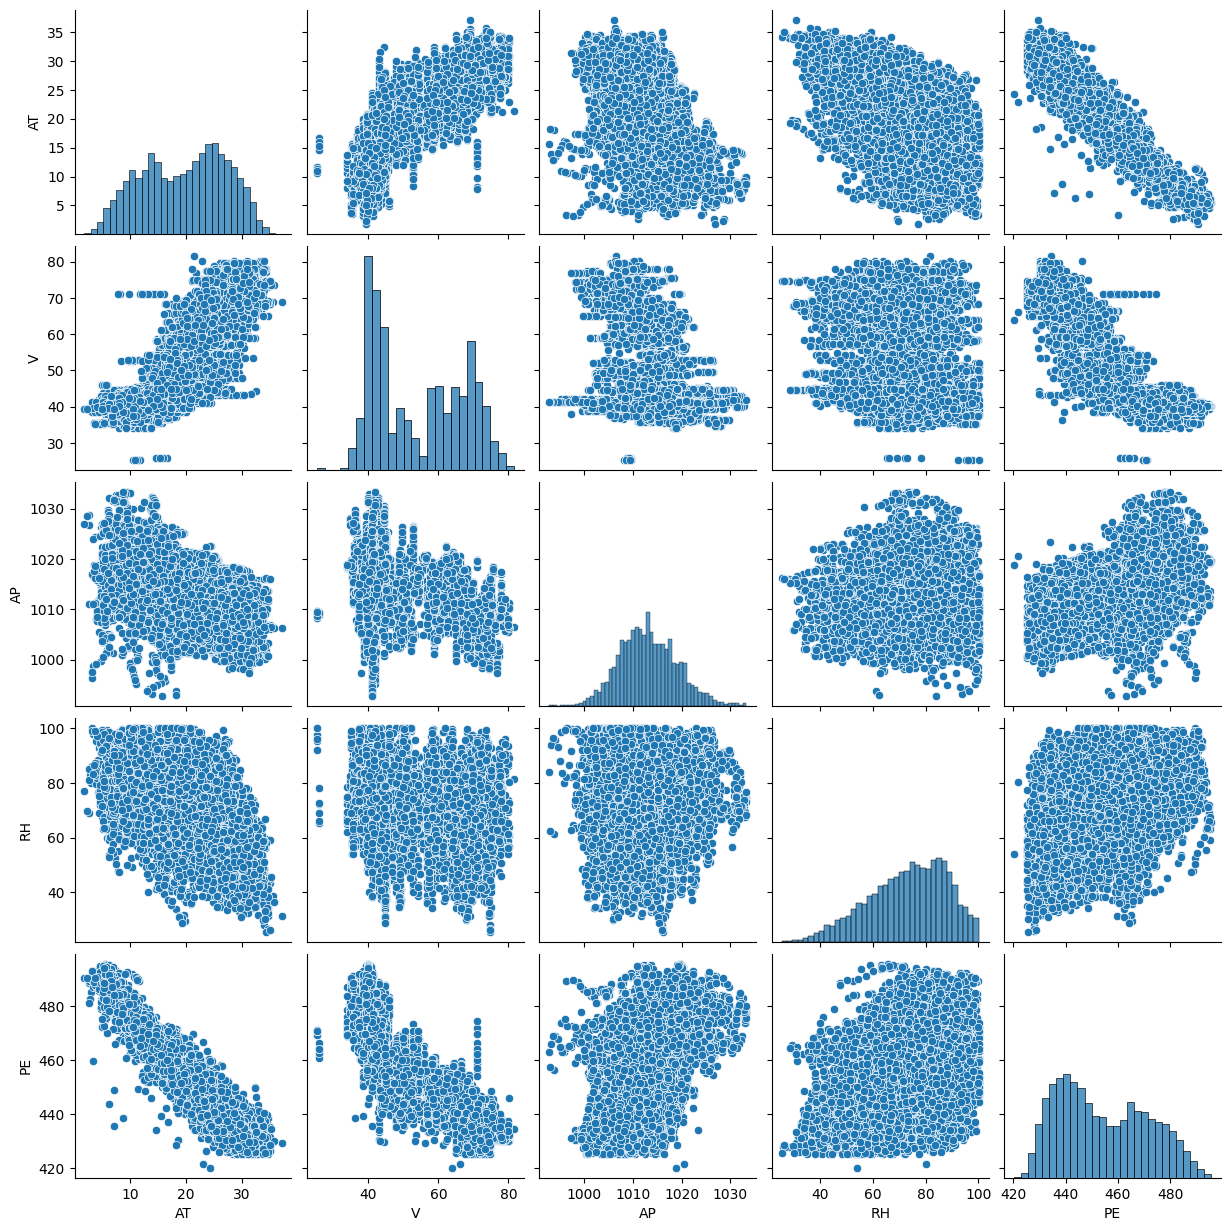

In [321]:
import seaborn as sns
sns.pairplot(data_2)

In [322]:
from sklearn.model_selection import train_test_split
y_ = data_2['PE']
X_ = data_2.drop(columns='PE')
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.3, random_state=230)

In [323]:
datos_train = pd.DataFrame(X_train_)
datos_train['PE'] = y_train_

In [324]:
from sklearn.metrics import r2_score

X_train_.head()
X_train_ = sm.add_constant(X_train_)
# Previsión con el modelo 0
modelo_energia_0 = sm.OLS(y_train_, X_train_[['const', 'AT', 'V', 'AP', 'RH']]).fit()
X_test_0 = sm.add_constant(X_test_[['AT', 'V', 'AP', 'RH']])
y_predict_ = modelo_energia_0.predict(X_test_0)
print(f'El coeficiente de determinación R² para el modelo con los datos de prueba es de:  {round(r2_score(y_test_, y_predict_),2)}')

El coeficiente de determinación R² para el modelo con los datos de prueba es de:  0.93


In [325]:
X_train_.columns

Index(['const', 'AT', 'V', 'AP', 'RH'], dtype='object')

In [326]:
# Modelo 1: solo AT
modelo_energia_1 = sm.OLS(y_train_, X_train_[['const','AT']]).fit()

# Modelo 2: AT y V
modelo_energia_2 = sm.OLS(y_train_, X_train_[['const','AT', 'V']]).fit()

# Modelo 3: AT, V y AP
modelo_energia_3 = sm.OLS(y_train_, X_train_[['const','AT', 'V', 'AP']]).fit()

# Modelo 4: AT, V y RH
modelo_energia_4 = sm.OLS(y_train_, X_train_[['const','AT', 'V', 'RH']]).fit()

In [327]:
# Creamos una lista con todos los modelos para imprimir sus resúmenes de forma ordenada
modelos_energia = [modelo_energia_0, modelo_energia_1, modelo_energia_2, modelo_energia_3, modelo_energia_4]

# Imprimimos el resumen estadístico de cada modelo para comparar sus resultados
for i,j in enumerate(modelos_energia):
  print(f'******************************************************************************\n******************* El modelo {i} tiene el siguiente resumen *******************\n******************************************************************************')
  print(j.summary(),'\n\n')

******************************************************************************
******************* El modelo 0 tiene el siguiente resumen *******************
******************************************************************************
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.191e+04
Date:                Thu, 31 Jul 2025   Prob (F-statistic):               0.00
Time:                        09:27:18   Log-Likelihood:                -19662.
No. Observations:                6697   AIC:                         3.933e+04
Df Residuals:                    6692   BIC:                         3.937e+04
Df Model:                           4                                         
Covariance Type:            nonrobust               

In [328]:
for i, j in enumerate (modelos_energia):
  print(f'El coeficiente de determinación R² del modelo {i}: {j.rsquared.round(3)}')

El coeficiente de determinación R² del modelo 0: 0.929
El coeficiente de determinación R² del modelo 1: 0.899
El coeficiente de determinación R² del modelo 2: 0.917
El coeficiente de determinación R² del modelo 3: 0.919
El coeficiente de determinación R² del modelo 4: 0.929


In [329]:
# Cuántos parámetros tiene el modelo?
modelo_energia_4.params

,0
const,518.456663
AT,-2.007523
V,-0.234775
RH,-0.162004


In [330]:
modelo_energia_0.params

,0
const,446.104172
AT,-1.960745
V,-0.241288
AP,0.070242
RH,-0.153685


In [331]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [332]:
# Definimos las listas de variables explicativas que se usarán en distintos modelos de regresión
explicativas_modelo_0 = ['const','AT', 'V', 'AP', 'RH']
explicativas_modelo_2 = ['const','AT', 'V']
explicativas_modelo_3 = ['const','AT', 'V', 'AP']
explicativas_modelo_4 = ['const','AT', 'V', 'RH']

## Primera etapa: Verifica la multicolinealidad utilizando el concepto de VIF

In [333]:
vif_mod_0 = pd.DataFrame()

# Agregamos los nombres de las variables al DataFrame
vif_mod_0['variables'] = explicativas_modelo_0
vif_mod_0['vif'] = [vif(X_train_[explicativas_modelo_0], i) for i in range(len(explicativas_modelo_0))]
vif_mod_0

,variables,vif
0,const,44603.788615
1,AT,6.034363
2,V,3.954998
3,AP,1.468530
4,RH,1.717508


## Segunda etapa: Realiza un análisis de residuos

In [334]:
y_previsto_train_ = modelo_energia_0.predict(X_train_[explicativas_modelo_0])

In [335]:
import plotly.express as px

In [336]:
fig = px.scatter(
    x=y_previsto_train_,
    y=y_train_,
    title='Valor Previsto vs Real',
    labels={'x': 'Valor Previsto', 'y': 'Valor Real'}
)
fig.show()

In [337]:
residuos_ = modelo_energia_0.resid

# Visualización de los residuos en función de los valores previstos
# Este gráfico ayuda a detectar patrones no deseados en los residuos
# Idealmente, los residuos deben estar distribuidos de forma aleatoria alrededor de 0
fig = px.scatter(
    x=y_previsto_train_,
    y=residuos_,
    title='Valor Previsto vs Residuos',
    labels={'x': 'Valor Previsto', 'y': 'Residuos'}
)
fig.show()


## Conclusión:
----
En el gráfico de residuos vs valores previstos, se observa una distribución mayoritariamente centrada alrededor de 0, con la mayoría de los residuos oscilando entre -10 y 10. Sin embargo, se detecta una leve curvatura en forma de U invertida, lo que sugiere una posible presencia de heterocedasticidad moderada. A pesar de ello, el patrón no es lo suficientemente fuerte como para invalidar por completo la hipótesis de homocedasticidad, aunque se recomienda precaución y considerar transformaciones o modelos robustos en caso de que el modelo sea sensible a este efecto.

In [338]:
# EXTRA: Test de Breusch-Pagan

from statsmodels.stats.diagnostic import het_breuschpagan

# Obtenemos los residuos y valores ajustados del modelo
residuos_ = modelo_energia_0.resid
valores_ajustados = modelo_energia_0.fittedvalues

# Aplicamos el test de Breusch-Pagan
# La función retorna: (LM stat, p-value, f-value, f p-value)
bp_test = het_breuschpagan(residuos_, modelo_energia_0.model.exog)

# Mostramos los resultados
print(f'Estadístico de LM: {bp_test[0]:.4f}')
print(f'Valor-p (LM): {bp_test[1]:.4f}')
print(f'Estadístico F: {bp_test[2]:.4f}')
print(f'Valor-p (F): {bp_test[3]:.4f}')

# Resultado:
# Hipótesis nula (H₀): Los residuos tienen varianza constante (homocedasticidad).
# Hipótesis alternativa (H₁): Los residuos no tienen varianza constante (hay heterocedasticidad).
# Como el valor-p es menor a 0.05 en ambas pruebas (LM y F), se rechaza la hipótesis nula.
# Esto indica que hay evidencia estadísticamente significativa de heterocedasticidad en tu modelo.

# Conclusión
# Tu modelo no presenta homocedasticidad, es decir, sí presenta heterocedasticidad.
# Esto confirma lo que ya intuías en el gráfico de residuos: hay una tendencia de dispersión no constante (aunque sea leve), reforzada ahora con evidencia estadística.

Estadístico de LM: 20.6977
Valor-p (LM): 0.0004
Estadístico F: 5.1866
Valor-p (F): 0.0004


## Con modelo 4

In [339]:
vif_mod_4 = pd.DataFrame()

# Agregamos los nombres de las variables al DataFrame
vif_mod_4['variables'] = explicativas_modelo_4
vif_mod_4['vif'] = [vif(X_train_[explicativas_modelo_4], i) for i in range(len(explicativas_modelo_4))]
vif_mod_4

,variables,vif
0,const,68.358325
1,AT,4.995739
2,V,3.896702
3,RH,1.591186


In [340]:
y_previsto_train_ = modelo_energia_4.predict(X_train_[explicativas_modelo_4])

In [341]:
fig = px.scatter(
    x=y_previsto_train_,
    y=y_train_,
    title='Valor Previsto vs Real',
    labels={'x': 'Valor Previsto', 'y': 'Valor Real'}
)
fig.show()

In [342]:
residuos_ = modelo_energia_4.resid

# Visualización de los residuos en función de los valores previstos
# Este gráfico ayuda a detectar patrones no deseados en los residuos
# Idealmente, los residuos deben estar distribuidos de forma aleatoria alrededor de 0
fig = px.scatter(
    x=y_previsto_train_,
    y=residuos_,
    title='Valor Previsto vs Residuos',
    labels={'x': 'Valor Previsto', 'y': 'Residuos'}
)
fig.show()


**Conclusión final sobre la selección del modelo**

>Al comparar los diferentes modelos propuestos para predecir la variable objetivo PE, el Modelo 4, que considera como variables explicativas AT, V y RH, se posiciona como la mejor alternativa en términos de balance entre simplicidad y desempeño.

**Desde el punto de vista estadístico:**

* El coeficiente de determinación R² del Modelo 4 es de 0.929, igual al del Modelo 0, pero utilizando una variable menos.

* Presenta menor multicolinealidad según los valores del VIF, en comparación con el Modelo 0.

* En la prueba de homocedasticidad (Breusch-Pagan), aunque el valor-p es bajo y sugiere presencia de heterocedasticidad, esta se manifiesta de forma leve.

**Desde el análisis gráfico:**

* El gráfico de residuos vs valores previstos del Modelo 4 muestra una dispersión más uniforme de los residuos alrededor del eje horizontal, lo que indica un mejor cumplimiento de la homocedasticidad respecto al Modelo 0.

* A pesar de la presencia de algunos outliers, la varianza de los residuos se mantiene relativamente constante en el rango de valores previstos.

**En resumen**, el Modelo 4 no solo mantiene un nivel de explicabilidad similar al modelo más complejo, sino que también mejora la estabilidad del modelo al reducir la complejidad y presentar un mejor comportamiento de los residuos. Por tanto, se considera la mejor opción para continuar con el análisis y/o realizar predicciones.